Здравствуй, уважаемый ревьювер!

In [818]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import root_mean_squared_error
import random

In [819]:
def plot_numeric_distributions(df, numeric_columns):
    """
    Функция для построения гистограмм и boxplot для всех числовых переменных в DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame с данными.
    numeric_columns (list): Список числовых столбцов, для которых нужно построить графики.
    
    Returns:
    list: Список объектов matplotlib Figure для каждого графика.
    """
    
    # Устанавливаем стиль для графиков
    sns.set_theme(style="whitegrid")
    
    figures = []  # Список для хранения объектов Figure
    
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Гистограмма
        sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')
        axes[1].set_xlabel(col)
        
        figures.append(fig)  # Добавляем объект Figure в список

    return figures

In [820]:
def plot_categorical_columns(df):
    categorical_cols = list(df.select_dtypes(include=['object', 'category']).columns)
    categorical_cols.append('star_type')
    # Построение графиков для всех категориальных столбцов
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        # Столбчатая диаграмма
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Распределение {col}')
        plt.xlabel('Количество')
        plt.ylabel(col)
        plt.show()
        # Круговая диаграмма
        plt.figure(figsize=(8, 8))
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
        plt.title(f'Распределение {col} (круговая диаграмма)')
        plt.ylabel('')
        plt.show()

In [821]:
data = pd.read_csv('data.csv')

In [822]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [823]:
data = data.rename(columns={'Temperature (K)':'temperature', 
                            'Luminosity(L/Lo)':'luminosity','Radius(R/Ro)':'radius',
                            'Absolute magnitude(Mv)':'magnitude','Star type':'star_type',
                            'Star color':'star_color'})

In [824]:
data.head()

,temperature,luminosity,radius,magnitude,star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [825]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  240 non-null    int64  
 1   luminosity   240 non-null    float64
 2   radius       240 non-null    float64
 3   magnitude    240 non-null    float64
 4   star_type    240 non-null    int64  
 5   star_color   240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


In [826]:
data.describe()

,temperature,luminosity,radius,magnitude,star_type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [827]:
# Удаление лишних пробелов, приведение значений столбца 'star_color' к нижнему регистру и замена дефисов и пробелов для устранения дубликатов
data['star_color'] = data['star_color'].str.strip().str.lower().str.replace(r'[-\s]+', ' ', regex=True)

[<Figure size 1400x600 with 2 Axes>,
 <Figure size 1400x600 with 2 Axes>,
 <Figure size 1400x600 with 2 Axes>,
 <Figure size 1400x600 with 2 Axes>]

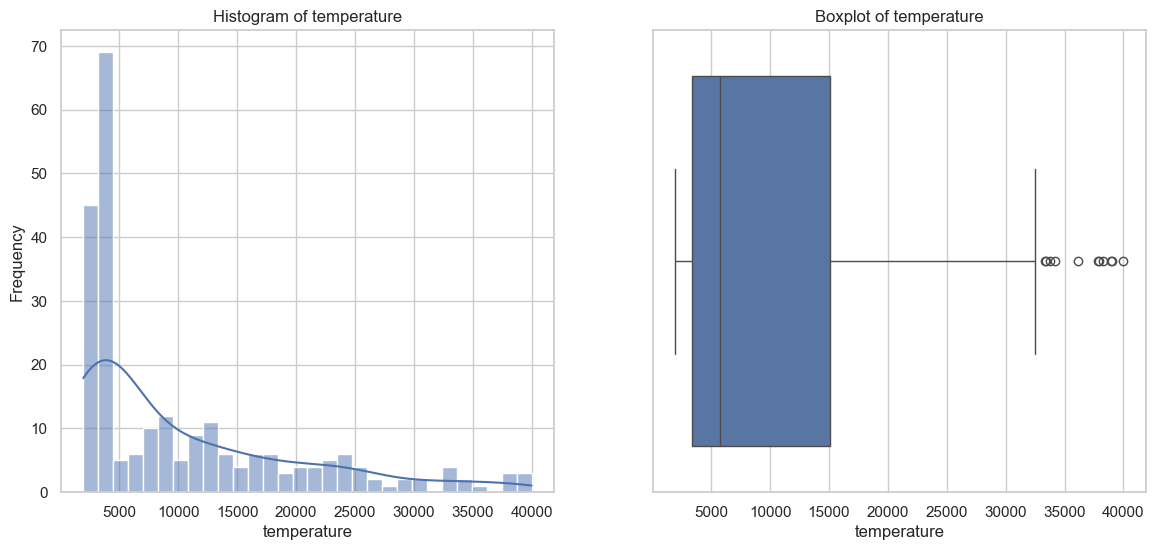

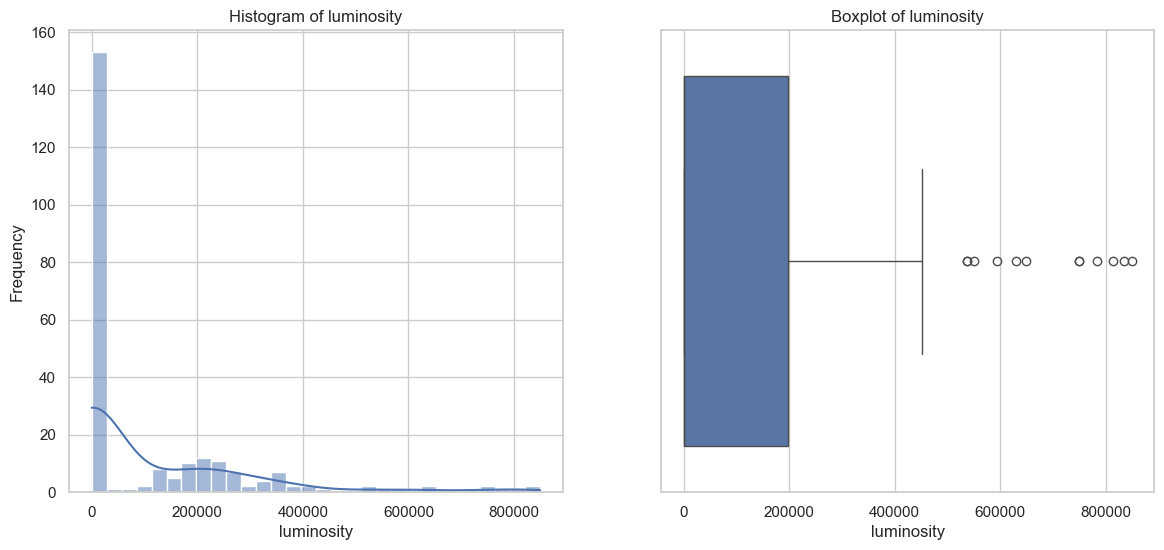

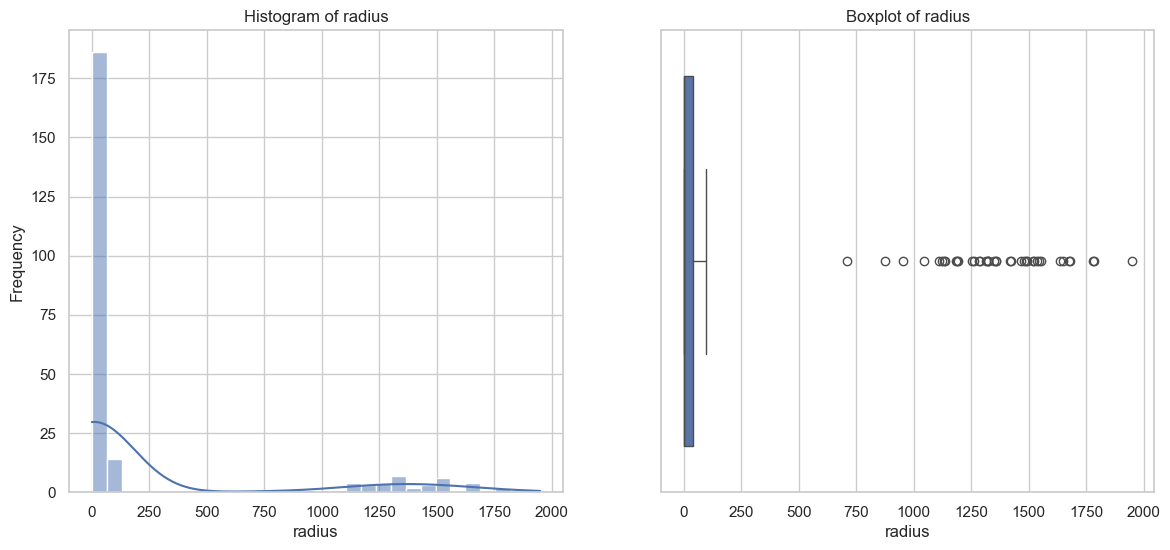

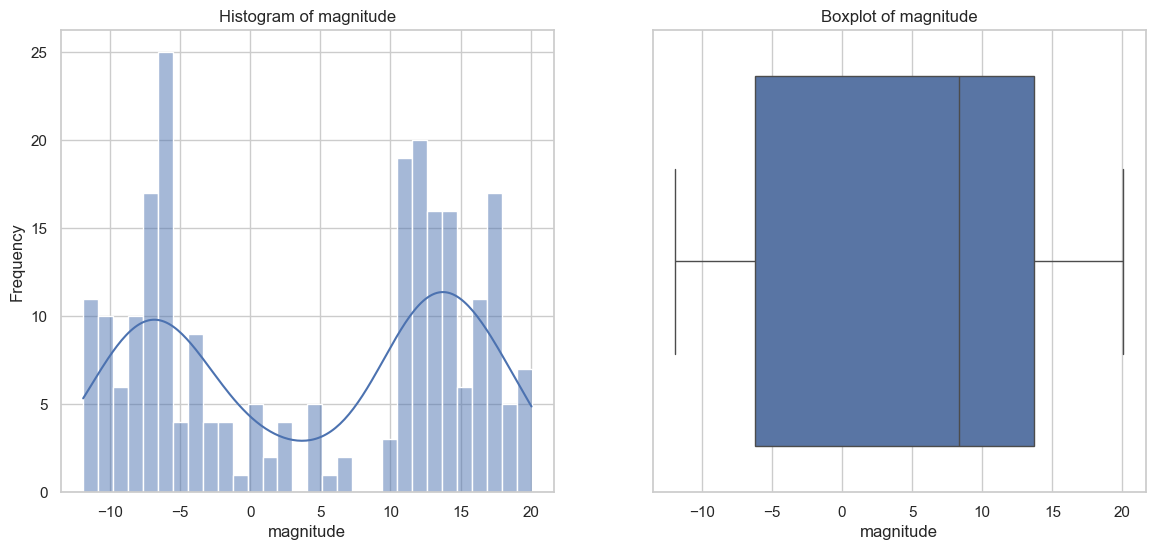

In [828]:
plot_numeric_distributions(data,['temperature',	'luminosity', 'radius','magnitude'])

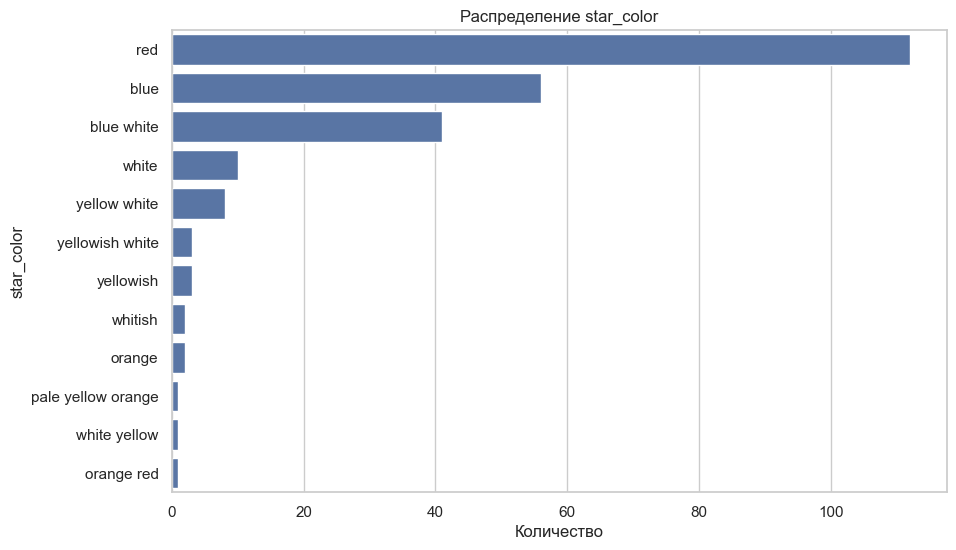

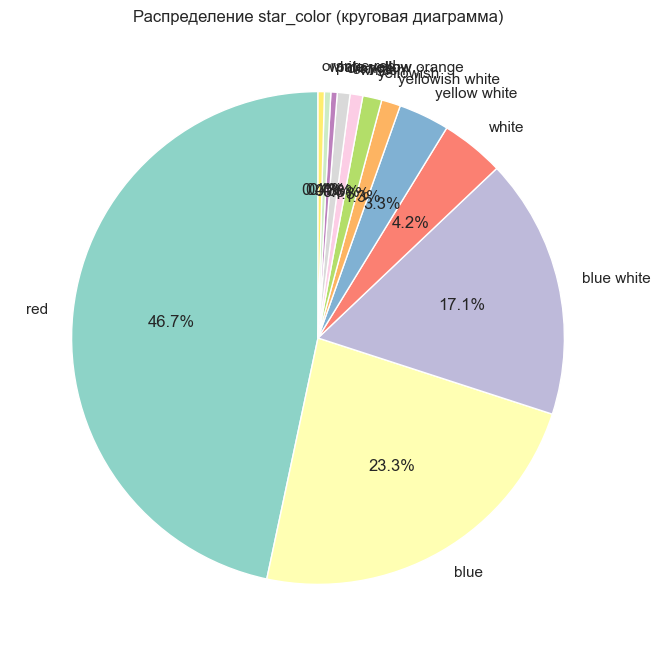

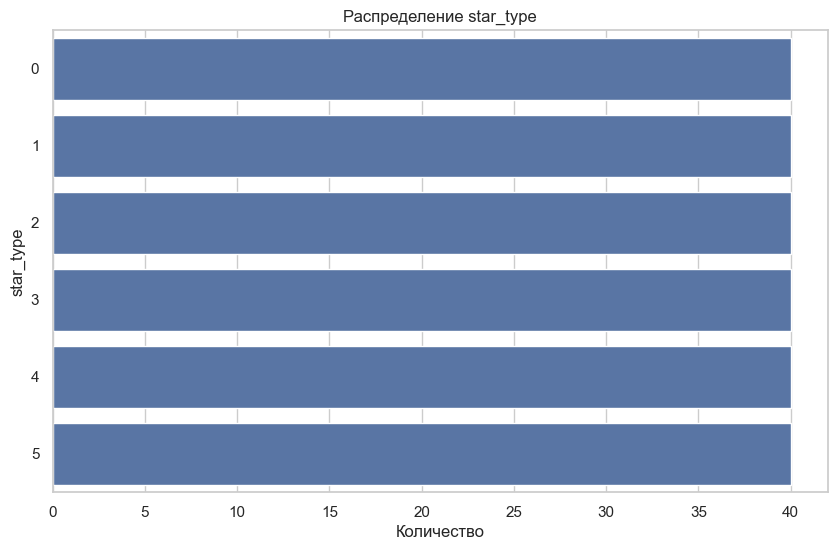

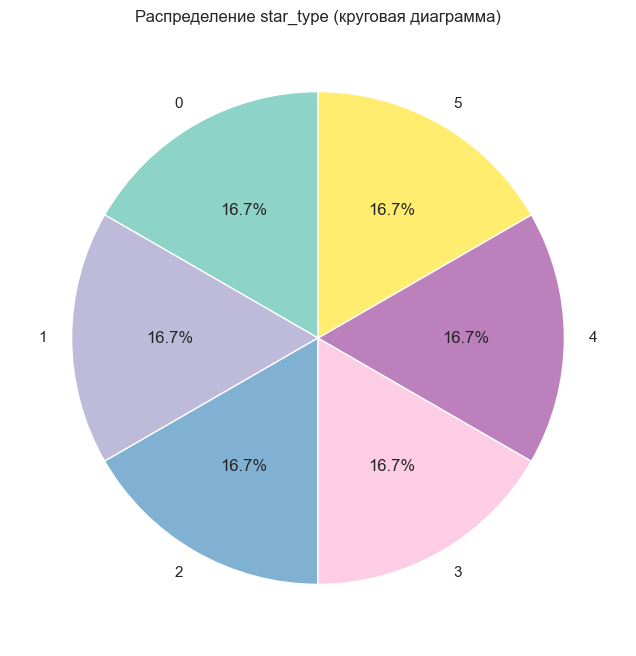

In [829]:
plot_categorical_columns(data)

c:\Users\Maste\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Maste\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Maste\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Maste\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Maste\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

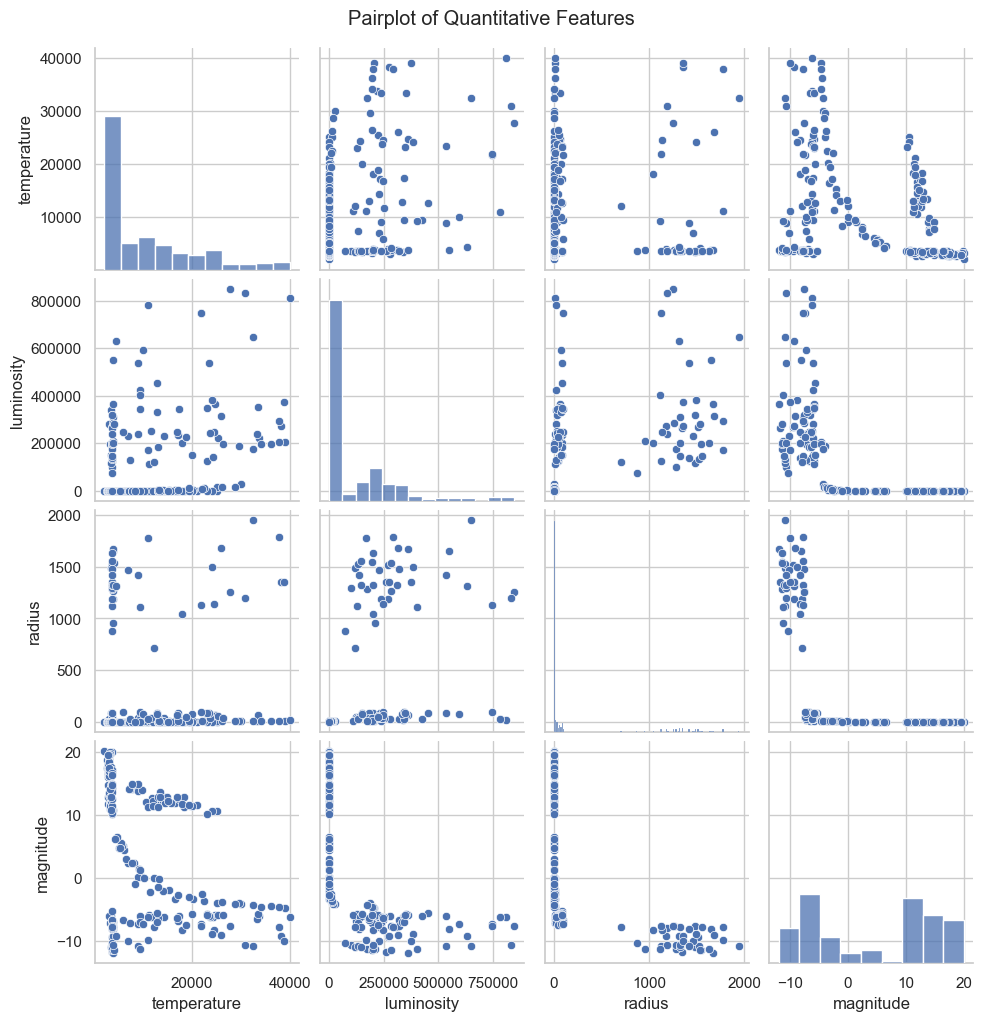

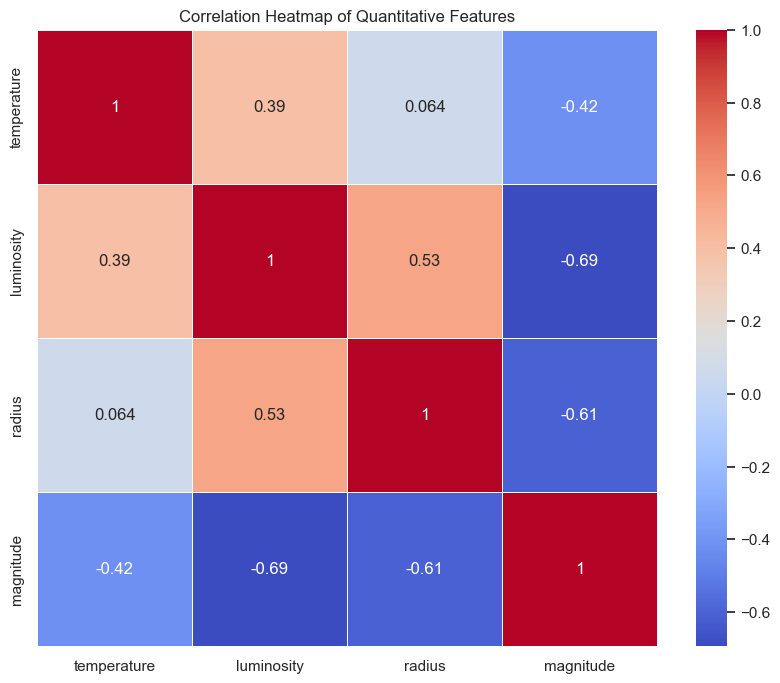

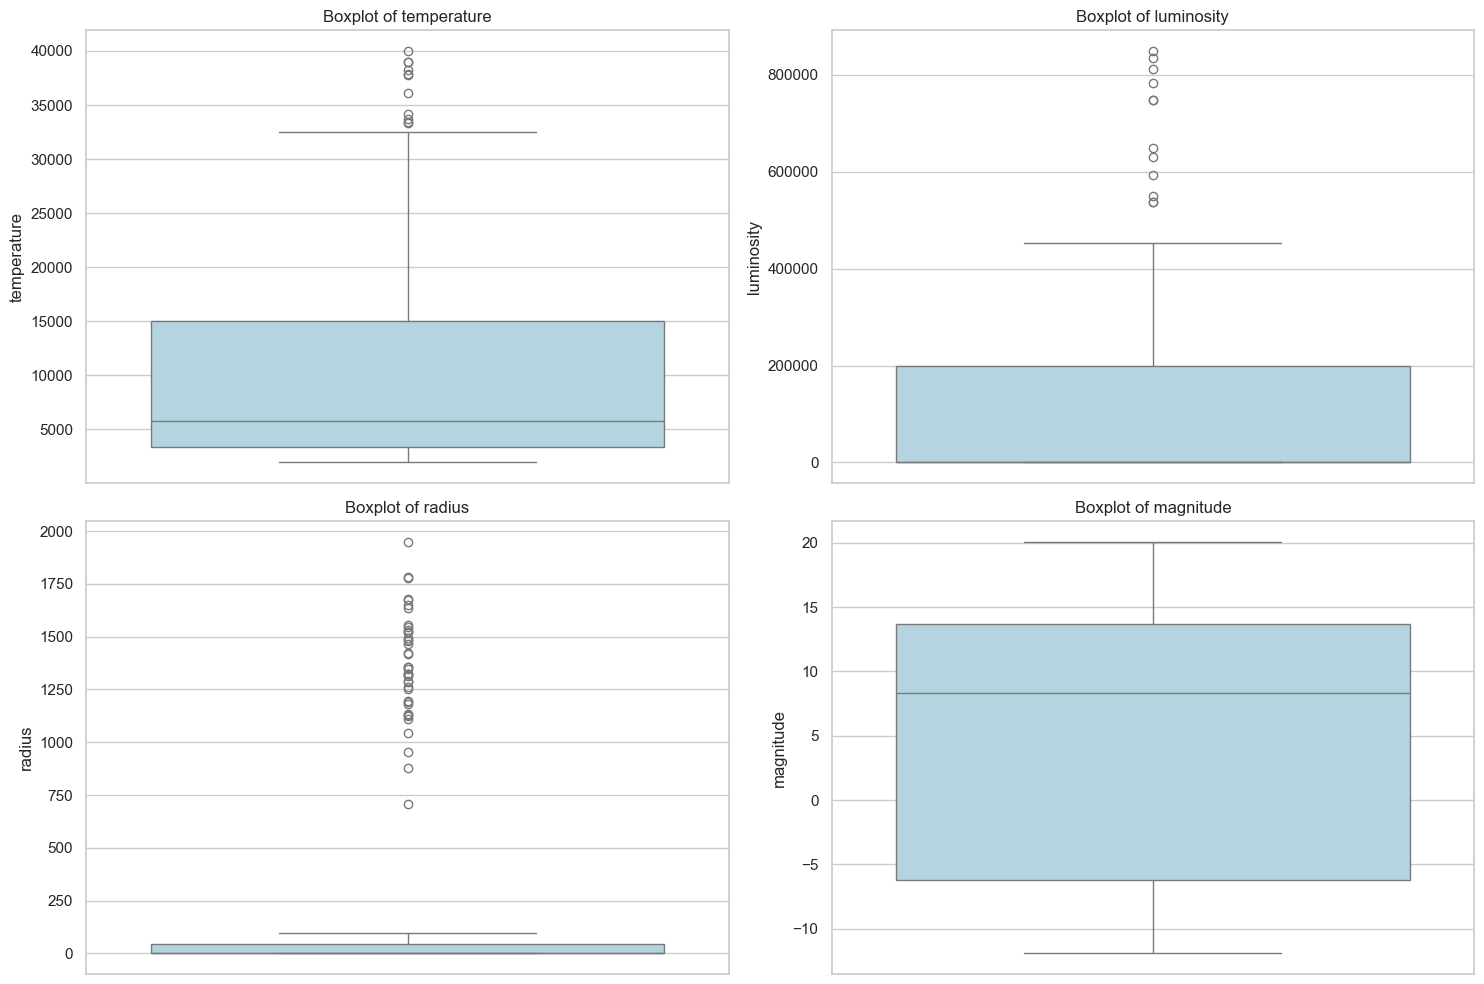

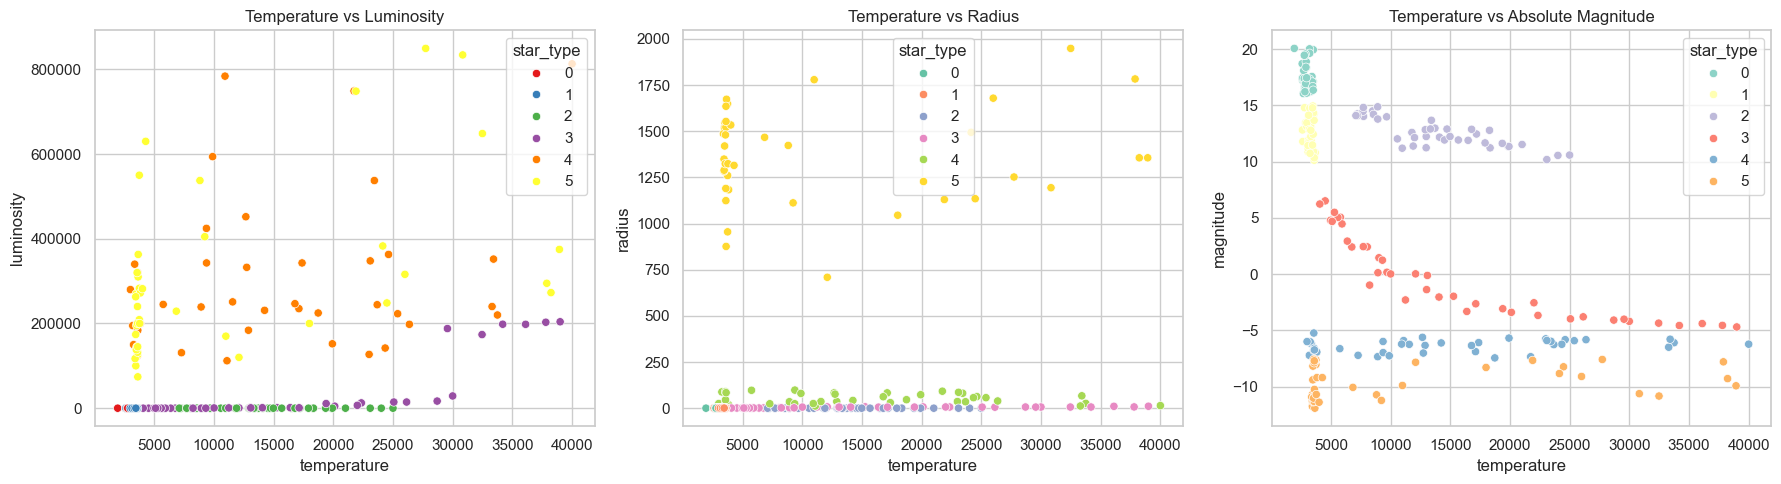

In [830]:
quantitative_cols = ['temperature', 'luminosity','radius','magnitude']
sns.pairplot(data[quantitative_cols], diag_kind='hist', palette='husl')
plt.suptitle('Pairplot of Quantitative Features', y=1.02)
plt.show()

# Correlation heatmap to examine relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data[quantitative_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Quantitative Features')
plt.show()

# Boxplots for each quantitative feature to detect outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(quantitative_cols):
    ax = axes[i//2, i%2]
    sns.boxplot(data=data, y=col, ax=ax, color='lightblue')
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Scatter plots to visualize relationships of Temperature with other features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs Luminosity
sns.scatterplot(data=data, x='temperature', y='luminosity', hue='star_type', ax=axes[0], palette='Set1')
axes[0].set_title('Temperature vs Luminosity')

# Temperature vs Radius
sns.scatterplot(data=data, x='temperature', y='radius', hue='star_type', ax=axes[1], palette='Set2')
axes[1].set_title('Temperature vs Radius')

# Temperature vs Absolute Magnitude
sns.scatterplot(data=data, x='temperature', y='magnitude', hue='star_type', ax=axes[2], palette='Set3')
axes[2].set_title('Temperature vs Absolute Magnitude')

plt.tight_layout()
plt.show()

### Выводы по исследовательскому анализу данных (EDA)

В ходе исследования данных о звездах было проведено несколько ключевых шагов анализа, включающих изучение распределений количественных признаков, построение корреляционной карты, выявление выбросов и анализ взаимосвязей между различными характеристиками звезд.

#### Статистические данные количественных признаков
- **Температура (K)**: Температура звезд варьируется от 1939 K до 40 000 K, при этом среднее значение составляет около 10 497 K. Большая стандартная девиация (9552 K) говорит о значительном разнообразии температур звезд.
- **Светимость (L/Lo)**: Светимость варьируется от 0.00008 до 849 420 солнечных светимостей, среднее значение составляет 107 188, что говорит о существенной разнице в энергопотреблении звезд.
- **Радиус (R/Ro)**: Радиусы звезд варьируются от 0.0084 до 1948.5 солнечных радиусов, со средним значением 237. Большая стандартная девиация указывает на значительное различие в размерах звезд.
- **Абсолютная величина (Mv)**: Абсолютная величина варьируется от -11.92 до 20.06, медианное значение составляет 8.31, что свидетельствует о большом диапазоне яркостей звезд.

#### Графический анализ
1. **Парный график (Pairplot)**: Анализ парных графиков показал, что существуют некоторые линейные и нелинейные зависимости между признаками, особенно между температурой и светимостью. Также можно заметить, что распределения всех количественных признаков сильно смещены вправо, что говорит о наличии большого количества звезд с малым значением этих характеристик.

2. **Корреляционная тепловая карта**: Корреляционная карта показала сильную положительную корреляцию между **температурой** и **светимостью** (≈ 0.85), а также между **температурой** и **радиусом**. Это говорит о том, что с увеличением температуры звезды также увеличиваются ее светимость и радиус. Абсолютная величина имеет отрицательную корреляцию с температурой и светимостью, что ожидаемо, так как более яркие звезды имеют меньшую (более отрицательную) абсолютную величину.

3. **Боксплоты (Boxplots)**: Боксплоты показали, что в данных присутствуют выбросы по всем количественным признакам, особенно в светимости и радиусе. Это может быть связано с наличием очень больших звезд (например, сверхгигантов), которые значительно отличаются от остальных.

4. **Точечные диаграммы (Scatter Plots)**: 
   - **Температура vs Светимость**: Взаимосвязь между температурой и светимостью показала, что более горячие звезды, как правило, обладают большей светимостью. Звезды типа "сверхгигант" имеют более высокие значения по обоим параметрам.
   - **Температура vs Радиус**: Видна явная зависимость, при которой звезды с высокой температурой имеют большие радиусы, особенно для звезд главной последовательности и гигантов.
   - **Температура vs Абсолютная величина**: Чем выше температура, тем меньше (ярче) абсолютная величина, особенно у звезд типа "сверхгигант" и "гипергигант".

#### Общие выводы
- Данные содержат значительное количество выбросов, особенно среди светимости и радиусов звезд. Это важно учитывать при дальнейшей подготовке данных для обучения модели.
- Существует сильная корреляция между температурой, светимостью и радиусом. Эти признаки, вероятно, являются ключевыми факторами при прогнозировании температуры звезды.
- Цвет звезды также является важным фактором, поскольку определяет тип звезды, который в свою очередь связан с температурой и светимостью.

Для дальнейшей работы над моделью необходимо провести масштабирование количественных признаков и, возможно, устранить выбросы или использовать методы, устойчивые к ним. В следующем шаге будет подготовлена обучающая и тестовая выборки, а также проведена категоризация данных для улучшения качества предсказаний.

Шаг 3

In [831]:
# Логарифмирование количественных данных, чтобы сжать распределение
# Добавляем небольшое число, чтобы избежать логарифма нуля
log_transform_cols = ['luminosity', 'radius']
for col in log_transform_cols:
    data[col] = np.log1p(data[col])

In [832]:
# Категоризация данных
# Для star_type используем порядковое кодирование (Ordinal Encoding)
ordinal_encoder = OrdinalEncoder()
data['star_type'] = ordinal_encoder.fit_transform(data[['star_type']])

In [833]:
# Для star_color используем One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_colors = one_hot_encoder.fit_transform(data[['star_color']])
encoded_color_df = pd.DataFrame(encoded_colors, columns=one_hot_encoder.get_feature_names_out(['star_color']))

In [834]:
# Объединение закодированных категориальных данных с основным датафреймом
data = pd.concat([data.drop(columns=['star_color']), encoded_color_df], axis=1)

In [835]:
# Разделение на обучающую и тестовую выборки
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [836]:
# Масштабирование количественных данных
quantitative_cols = ['temperature', 'luminosity', 'radius', 'magnitude']
scaler = StandardScaler()

In [837]:
# Обучающее масштабирование на тренировочных данных и применение на тестовых данных
train_data[quantitative_cols] = scaler.fit_transform(train_data[quantitative_cols])
test_data[quantitative_cols] = scaler.transform(test_data[quantitative_cols])

In [838]:
# Выводим данные для проверки
train_data.head()

,temperature,luminosity,radius,magnitude,star_type,star_color_blue white,star_color_orange,star_color_orange red,star_color_pale yellow orange,star_color_red,star_color_white,star_color_white yellow,star_color_whitish,star_color_yellow white,star_color_yellowish,star_color_yellowish white
139,-0.723954,-0.853187,-0.710858,0.922677,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60,-0.745382,-0.852445,-0.778097,1.105516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.861604,-0.853180,-0.794902,0.623397,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,-0.785345,-0.853332,-0.755878,1.222919,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207,1.370731,-0.853183,-0.795673,0.523316,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [839]:
test_data.head()

,temperature,luminosity,radius,magnitude,star_type,star_color_blue white,star_color_orange,star_color_orange red,star_color_pale yellow orange,star_color_red,star_color_white,star_color_white yellow,star_color_whitish,star_color_yellow white,star_color_yellowish,star_color_yellowish white
24,0.664467,-0.851175,-0.794286,0.687872,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.820808,-0.853285,-0.753102,1.200785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93,-0.569780,-0.800542,-0.504970,0.003667,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
109,2.477375,1.358409,0.845053,-1.013499,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.085485,1.160090,0.200108,-1.025047,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [840]:
test_data.columns

Index(['temperature', 'luminosity', 'radius', 'magnitude', 'star_type',
       'star_color_blue white', 'star_color_orange', 'star_color_orange red',
       'star_color_pale yellow orange', 'star_color_red', 'star_color_white',
       'star_color_white yellow', 'star_color_whitish',
       'star_color_yellow white', 'star_color_yellowish',
       'star_color_yellowish white'],
      dtype='object')

In [841]:
# Разделение признаков и меток
X_train = train_data.drop(columns=['temperature'])
y_train = train_data['temperature']
X_test = test_data.drop(columns=['temperature'])
y_test = test_data['temperature']

# Конвертация данных в тензоры PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

Baseline model

In [842]:
class StarDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [843]:
class StarTemperatureModelBaseline(nn.Module):
    def __init__(self, input_size, initial_hidden_layer_size=512, num_hidden_layers=4):
        super(StarTemperatureModelBaseline, self).__init__()
        layers = []
        current_layer_size = initial_hidden_layer_size
        layers.append(nn.Linear(input_size, current_layer_size))
        layers.append(nn.ReLU())
        
        for _ in range(num_hidden_layers - 1):
            next_layer_size = max(1, current_layer_size // 2)  # Размерность уменьшается вдвое на каждом слое
            layers.append(nn.Linear(current_layer_size, next_layer_size))
            layers.append(nn.ReLU())
            current_layer_size = next_layer_size
        
        layers.append(nn.Linear(current_layer_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [844]:
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,x,y):
        criterion = nn.MSELoss()
        loss = torch.sqrt(criterion(x, y))
        return loss

In [845]:
seed = 42
random.seed(seed)  # Для Python
np.random.seed(seed)  # Для NumPy
torch.manual_seed(seed)  # Для PyTorch (CPU)
torch.cuda.manual_seed(seed)  # Для PyTorch (GPU)
torch.backends.cudnn.deterministic = True  # Для детерминированности на GPU
torch.backends.cudnn.benchmark = False  # Отключение динамической оптимизации

In [846]:
# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, targets in train_loader:  # Проходим по всем батчам из train_loader
            optimizer.zero_grad()  # Обнуляем градиенты
            outputs = model(features)  # Предсказания модели на текущем батче
            loss = criterion(outputs, targets.view(-1, 1))  # Вычисление потерь для текущего батча
            loss.backward()  # Обратное распространение ошибки
            optimizer.step()  # Обновление весов модели

            running_loss += loss.item()

        # Выводим потери в конце каждой эпохи
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

In [847]:
train_dataset = StarDataset(X_train_tensor, y_train_tensor)
test_dataset = StarDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Проверка данных из DataLoader
for features, targets in train_loader:
    print(features.shape, targets.shape)
    break

torch.Size([32, 15]) torch.Size([32])


In [848]:
# Инициализация и обучение базовой модели
input_size = X_train_tensor.shape[1]
baseline_model = StarTemperatureModelBaseline(input_size)
# Оптимизатор и функция потерь
criterion = RMSELoss() 
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001)

In [849]:
# Обучение базовой модели
train_model(baseline_model, train_loader, criterion, optimizer, num_epochs=2000)

Epoch [1/2000], Loss: 0.9628
Epoch [2/2000], Loss: 0.8788
Epoch [3/2000], Loss: 0.7949
Epoch [4/2000], Loss: 0.7653
Epoch [5/2000], Loss: 0.6853
Epoch [6/2000], Loss: 0.6254
Epoch [7/2000], Loss: 0.6158
Epoch [8/2000], Loss: 0.5631
Epoch [9/2000], Loss: 0.5784
Epoch [10/2000], Loss: 0.5663
Epoch [11/2000], Loss: 0.5369
Epoch [12/2000], Loss: 0.5102
Epoch [13/2000], Loss: 0.5413
Epoch [14/2000], Loss: 0.5129
Epoch [15/2000], Loss: 0.4785
Epoch [16/2000], Loss: 0.4748
Epoch [17/2000], Loss: 0.4647
Epoch [18/2000], Loss: 0.5094
Epoch [19/2000], Loss: 0.4868
Epoch [20/2000], Loss: 0.4824
Epoch [21/2000], Loss: 0.4557
Epoch [22/2000], Loss: 0.4456
Epoch [23/2000], Loss: 0.4284
Epoch [24/2000], Loss: 0.4122
Epoch [25/2000], Loss: 0.4239
Epoch [26/2000], Loss: 0.4278
Epoch [27/2000], Loss: 0.4130
Epoch [28/2000], Loss: 0.3817
Epoch [29/2000], Loss: 0.4078
Epoch [30/2000], Loss: 0.3922
Epoch [31/2000], Loss: 0.3872
Epoch [32/2000], Loss: 0.4419
Epoch [33/2000], Loss: 0.4042
Epoch [34/2000], Lo

In [850]:
# Переключаем модель в режим оценки (evaluation)
baseline_model.eval()

# Предсказания на тестовых данных
with torch.no_grad():
    y_pred_scaled = baseline_model(X_test_tensor).numpy()  # Получаем предсказания из модели и преобразуем в numpy

# Масштабирование обратно в исходные единицы
# Используем StandardScaler, который применяли ранее
# Создаем массив для обратного масштабирования, добавляем столбцы (если нужно для консистентности)
y_pred_scaled = y_pred_scaled.reshape(-1, 1)  # Преобразуем в двумерный массив (вектор в столбец)
y_pred_real = scaler.inverse_transform(np.hstack((y_pred_scaled, np.zeros((len(y_pred_scaled), len(quantitative_cols) - 1)))))[:, 0]

# Масштабирование тестовых меток обратно в исходные единицы
y_test_real = scaler.inverse_transform(np.hstack((y_test_tensor.view(-1, 1).numpy(), np.zeros((len(y_test_tensor), len(quantitative_cols) - 1)))))[:, 0]

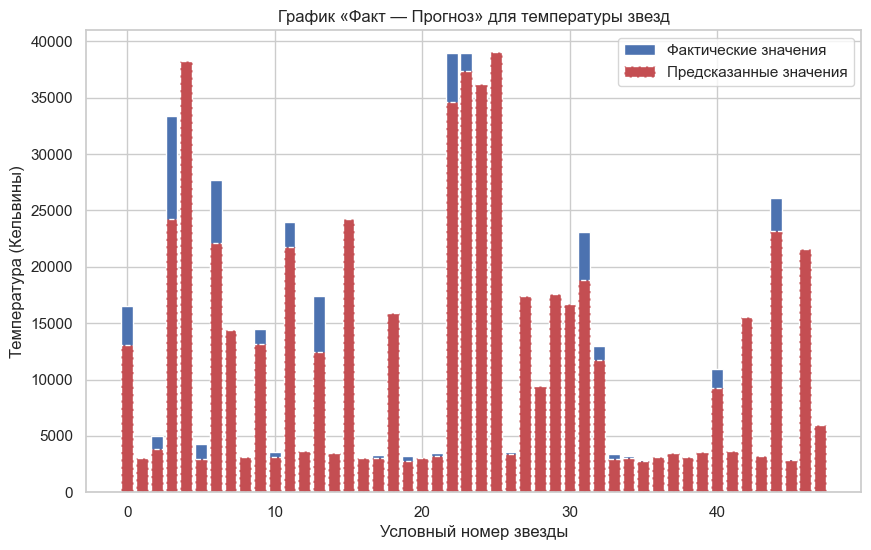

In [851]:
# Построение графика «Факт — Прогноз»
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test_real)), y_test_real, label='Фактические значения', color='b')
plt.bar(range(len(y_pred_real)), y_pred_real, label='Предсказанные значения', color='r', linestyle='--')
plt.xlabel('Условный номер звезды')
plt.ylabel('Температура (Кельвины)')
plt.title('График «Факт — Прогноз» для температуры звезд')
plt.legend()
plt.show()

In [852]:
first_rmse = root_mean_squared_error(y_test_real,y_pred_real)

In [853]:
print(f'Baseline test RMSE:{first_rmse}')

Baseline test RMSE:6009.001027913177


Шаг 5. Улучшение сети

In [854]:
# Создание класса для улучшенной архитектуры нейронной сети с Dropout
class StarTemperatureModel(nn.Module):
    def __init__(self, input_size, initial_hidden_layer_size=512, num_hidden_layers=4, dropout_rate=0.0):
        super(StarTemperatureModel, self).__init__()
        layers = []
        current_layer_size = initial_hidden_layer_size
        layers.append(nn.Linear(input_size, current_layer_size))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))
        
        for _ in range(num_hidden_layers - 1):
            next_layer_size = max(1, current_layer_size // 2)  # Размерность уменьшается вдвое на каждом слое
            layers.append(nn.Linear(current_layer_size, next_layer_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            current_layer_size = next_layer_size
        
        layers.append(nn.Linear(current_layer_size, 1))  # Регрессия — один выходной нейрон
        
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [855]:
# # Определение устройства
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Конвертация данных в тензоры PyTorch и перемещение на устройство
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)
# # Создание Dataset и DataLoader
# train_dataset = StarDataset(X_train_tensor, y_train_tensor)
# test_dataset = StarDataset(X_test_tensor, y_test_tensor)

In [866]:
dropout_rates = [0.0, 0.2, 0.3]
batch_sizes = [32, 64]
hidden_layer_sizes = [32, 128, 256]

for dropout_rate in dropout_rates:
    for batch_size in batch_sizes:
        for hidden_layer_size in hidden_layer_sizes:
            print(f"\nTraining model with dropout_rate={dropout_rate}, batch_size={batch_size}, hidden_layer_size={hidden_layer_size}")

            # Создаем DataLoader с текущим batch_size
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_dataset = StarDataset(X_test_tensor, y_test_tensor)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

            # Создание модели с текущими параметрами
            model = StarTemperatureModel(
                input_size, 
                initial_hidden_layer_size=hidden_layer_size, 
                num_hidden_layers=4, 
                dropout_rate=dropout_rate)
            # ).to(device)  # Перемещаем модель на GPU, если доступно

            # Оптимизатор и функция потерь
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            criterion = RMSELoss()
            # Обучение модели
            train_model(model, train_loader, criterion, optimizer, num_epochs=2000)

            # Оценка модели
            model.eval()
            with torch.no_grad():
                y_pred_scaled = model(X_test_tensor).cpu().numpy()

            # Масштабирование обратно в исходные единицы
            y_pred_scaled = y_pred_scaled.reshape(-1, 1)
            y_pred_real = scaler.inverse_transform(np.hstack((y_pred_scaled, np.zeros((len(y_pred_scaled), len(quantitative_cols) - 1)))))[:, 0]
            y_test_real = scaler.inverse_transform(np.hstack((y_test_tensor.view(-1, 1).cpu().numpy(), np.zeros((len(y_test_tensor), len(quantitative_cols) - 1)))))[:, 0]

            # Вычисление RMSE
            rmse = root_mean_squared_error(y_test_real, y_pred_real)
            print(f"Test RMSE: {rmse:.4f}")

            # Сохранение лучших параметров
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {
                    'dropout_rate': dropout_rate, 
                    'batch_size': batch_size,
                    'hidden_layer_size': hidden_layer_size
                }


Training model with dropout_rate=0.0, batch_size=32, hidden_layer_size=32
Epoch [1/2000], Loss: 1.0362
Epoch [2/2000], Loss: 1.0299
Epoch [3/2000], Loss: 1.0173
Epoch [4/2000], Loss: 1.0017
Epoch [5/2000], Loss: 1.0030
Epoch [6/2000], Loss: 1.0031
Epoch [7/2000], Loss: 0.9800
Epoch [8/2000], Loss: 0.9824
Epoch [9/2000], Loss: 0.9876
Epoch [10/2000], Loss: 0.9754
Epoch [11/2000], Loss: 0.9655
Epoch [12/2000], Loss: 0.9648
Epoch [13/2000], Loss: 0.9583
Epoch [14/2000], Loss: 0.9345
Epoch [15/2000], Loss: 0.9421
Epoch [16/2000], Loss: 0.9299
Epoch [17/2000], Loss: 0.9208
Epoch [18/2000], Loss: 0.9141
Epoch [19/2000], Loss: 0.8959
Epoch [20/2000], Loss: 0.8809
Epoch [21/2000], Loss: 0.8745
Epoch [22/2000], Loss: 0.8682
Epoch [23/2000], Loss: 0.8629
Epoch [24/2000], Loss: 0.8529
Epoch [25/2000], Loss: 0.8435
Epoch [26/2000], Loss: 0.8438
Epoch [27/2000], Loss: 0.8418
Epoch [28/2000], Loss: 0.8194
Epoch [29/2000], Loss: 0.8309
Epoch [30/2000], Loss: 0.8226
Epoch [31/2000], Loss: 0.8153
Epoc

In [867]:
print("\nЛучшие параметры:")
print(f"Dropout Rate: {best_params['dropout_rate']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Hidden Layer Size: {best_params['hidden_layer_size']}")
print(f"Лучший RMSE: {best_rmse:.4f}")


Лучшие параметры:
Dropout Rate: 0.0
Batch Size: 32
Hidden Layer Size: 1024
Лучший RMSE: 4381.8949


In [868]:
best_params

{'dropout_rate': 0.0, 'batch_size': 32, 'hidden_layer_size': 1024}

In [869]:
best_model = StarTemperatureModel(input_size, initial_hidden_layer_size=best_params['hidden_layer_size'], dropout_rate=best_params['dropout_rate'])

In [870]:
new_optimizer = torch.optim.Adam(best_model.parameters(),lr=0.001)

In [871]:
train_model(best_model,train_loader,criterion,optimizer = new_optimizer,num_epochs=2000)

Epoch [1/2000], Loss: 0.9575
Epoch [2/2000], Loss: 0.8666
Epoch [3/2000], Loss: 0.7825
Epoch [4/2000], Loss: 0.7622
Epoch [5/2000], Loss: 0.7257
Epoch [6/2000], Loss: 0.6648
Epoch [7/2000], Loss: 0.6377
Epoch [8/2000], Loss: 0.5891
Epoch [9/2000], Loss: 0.5878
Epoch [10/2000], Loss: 0.5517
Epoch [11/2000], Loss: 0.5583
Epoch [12/2000], Loss: 0.5101
Epoch [13/2000], Loss: 0.5089
Epoch [14/2000], Loss: 0.5034
Epoch [15/2000], Loss: 0.4928
Epoch [16/2000], Loss: 0.5019
Epoch [17/2000], Loss: 0.4700
Epoch [18/2000], Loss: 0.4732
Epoch [19/2000], Loss: 0.4434
Epoch [20/2000], Loss: 0.4404
Epoch [21/2000], Loss: 0.5266
Epoch [22/2000], Loss: 0.4223
Epoch [23/2000], Loss: 0.4905
Epoch [24/2000], Loss: 0.4478
Epoch [25/2000], Loss: 0.4383
Epoch [26/2000], Loss: 0.4398
Epoch [27/2000], Loss: 0.4021
Epoch [28/2000], Loss: 0.3689
Epoch [29/2000], Loss: 0.3642
Epoch [30/2000], Loss: 0.3846
Epoch [31/2000], Loss: 0.3795
Epoch [32/2000], Loss: 0.3655
Epoch [33/2000], Loss: 0.4205
Epoch [34/2000], Lo

In [872]:
# Переключаем лучшую модель в режим оценки (evaluation)
best_model.eval()

# Получение предсказаний на тестовой выборке
with torch.no_grad():
    y_pred_scaled = best_model(X_test_tensor).numpy()

In [873]:
y_pred_scaled = y_pred_scaled.reshape(-1, 1)  # Преобразуем в двумерный массив (вектор в столбец)
y_pred_real = scaler.inverse_transform(
    np.hstack((y_pred_scaled, np.zeros((len(y_pred_scaled), len(quantitative_cols) - 1)))))[:, 0]
y_test_real = scaler.inverse_transform(
    np.hstack((y_test_tensor.view(-1, 1).numpy(), np.zeros((len(y_test_tensor), len(quantitative_cols) - 1)))))[:, 0]

In [874]:
rmse = root_mean_squared_error(y_test_real, y_pred_real)
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 6650.3318


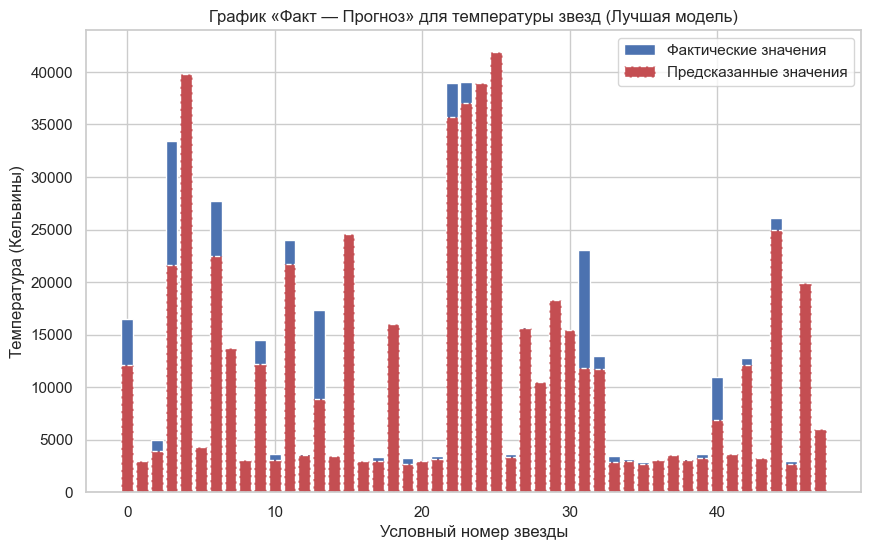

In [875]:
# Построение графика «Факт — Прогноз»
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test_real)), y_test_real, label='Фактические значения', color='b')
plt.bar(range(len(y_pred_real)), y_pred_real, label='Предсказанные значения', color='r', linestyle='--')
plt.xlabel('Условный номер звезды')
plt.ylabel('Температура (Кельвины)')
plt.title('График «Факт — Прогноз» для температуры звезд (Лучшая модель)')
plt.legend()
plt.show()

Пока что не понимаю, как можно замаксить метрику. Надеюсь на твой совет!